#Instalacion de librerias

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 48.9 MB/s eta 0:00:00


# Librerias

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer

# Codigo shor

## Modulos => _7mod15, QFT

In [ ]:
def _7mod15():
    circ = QuantumCircuit(8)
    circ.x(4)
    circ.cx(0,5)
    circ.cx(0,6)
    circ.cx(1,4)
    circ.cx(1,6)
    for i in range(4,8):
        circ.ccx(0,1,i)
    gate = circ.to_gate()
    gate.name = "7^x mod 15"
    return gate

def QFT(n):
    qft_circ = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        qft_circ.h(i)

        for j in range(i - 1, -1, -1):
            qft_circ.cp(pi/(2 ** (i - j)), j, i)


    for i in range(n // 2):
        qft_circ.swap(i, n - i - 1)
    gate = qft_circ.to_gate()
    gate.name = "QFT" + str(n)
    return  gate

## Circuito

In [ ]:
circ = QuantumCircuit(8,4)
circ.h(range(4))
circ.append(_7mod15(), range(8))
circ.measure(range(4,8),range(4))
circ.barrier(range(8))
circ.append(QFT(4), range(4))
circ.measure(range(4), range(4))
circ.draw(output = 'text')

┌───┐┌─────────────┐             ░ ┌───────┐┌─┐         
q_0: ┤ H ├┤0            ├─────────────░─┤0      ├┤M├─────────
     ├───┤│             │             ░ │       │└╥┘┌─┐      
q_1: ┤ H ├┤1            ├─────────────░─┤1      ├─╫─┤M├──────
     ├───┤│             │             ░ │  QFT4 │ ║ └╥┘┌─┐   
q_2: ┤ H ├┤2            ├─────────────░─┤2      ├─╫──╫─┤M├───
     ├───┤│             │             ░ │       │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤3            ├─────────────░─┤3      ├─╫──╫──╫─┤M├
     └───┘│  7^x mod 15 │┌─┐          ░ └───────┘ ║  ║  ║ └╥┘
q_4: ─────┤4            ├┤M├──────────░───────────╫──╫──╫──╫─
          │             │└╥┘┌─┐       ░           ║  ║  ║  ║ 
q_5: ─────┤5            ├─╫─┤M├───────░───────────╫──╫──╫──╫─
          │             │ ║ └╥┘┌─┐    ░           ║  ║  ║  ║ 
q_6: ─────┤6            ├─╫──╫─┤M├────░───────────╫──╫──╫──╫─
          │             │ ║  ║ └╥┘┌─┐ ░           ║  ║  ║  ║ 
q_7: ─────┤7            ├─╫──╫──╫─┤M├─░───────────╫──╫──╫──╫─
          └─────────────┘ ║  ║  ║ └╥┘ ░           ║  ║  ║  ║ 
c: 4/═════════════════════╩══╩══╩══╩══════════════╩══╩══╩══╩═
                          0  1  2  3              0  1  2  3

## simulacion

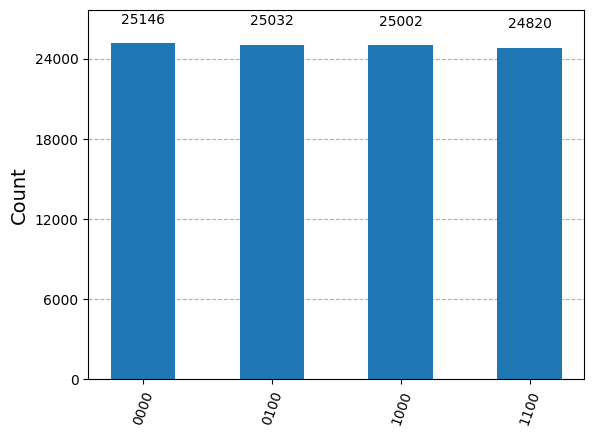

In [ ]:
# Seleccionar el backend
backend = Aer.get_backend("aer_simulator")

# Compilar el circuito para el backend
transpiled_circuit = transpile(circ, backend)

# Ejecutar el circuito
job = backend.run(transpiled_circuit, shots=100000)

# Obtener los resultados
result = job.result()
counts = result.get_counts()

# Visualizar los resultados
plot_histogram(counts)

## Verificacion

In [ ]:
# con esto sabemos que 4 es raiz cuadrada ya que el mcd de 4 8 12 es 4
# sabiendo esto podemos calcular los factores primos de la siguiente manera:

import math

primer_factor = math.gcd(4-1, 15)
segundo_factor = math.gcd(4+1, 15)
print("factores primos:", primer_factor, segundo_factor)

factores primos: 3 5


# Codigo RSA

In [ ]:
import random
from sympy import isprime, mod_inverse

def generar_primo(bits):
    while True:
        # Generar un número aleatorio de bits
        primo_candidato = random.getrandbits(bits)
        # Comprobar si es primo
        if isprime(primo_candidato):
            return primo_candidato

def generar_rsa_keys(bits):
    # Elegir dos números primos
    p = generar_primo(bits)
    q = generar_primo(bits)

    # Asegurar que p y q son diferentes
    while q == p:
        q = generar_primo(bits)

    n = p * q
    phi = (p - 1) * (q - 1)

    # Elegir e, esta es una eleccion comun para e
    e = 65537
    d = mod_inverse(e, phi)

    return (e, n), (d, n)

def encriptar_rsa(public_key, plaintext):
    e, n = public_key

    # Convertir el mensaje a entero
    plaintext_int = int.from_bytes(plaintext.encode(), 'big')

    # Encriptar el mensaje y retornarlo
    ciphertext = pow(plaintext_int, e, n)
    return ciphertext

def desencriptar_rsa(private_key, ciphertext):
    d, n = private_key

    # Desencriptar el mensaje y retornarlo
    plaintext_int = pow(ciphertext, d, n)
    plaintext_bytes = plaintext_int.to_bytes((plaintext_int.bit_length() + 7) // 8, 'big')

    # Convertir el mensaje a string
    return plaintext_bytes.decode()

# Generar RSA keys
public_key, private_key = generar_rsa_keys(45)

# Ejemplo
print(f"Clave publica: {public_key}")
#print(f"Clave privada: {private_key}")
mensaje = "Encriptar RSA"
ciphertext = encriptar_rsa(public_key, mensaje)
print(f"Ciphertext: {ciphertext}")

decrypted_message = desencriptar_rsa(private_key, ciphertext)
print(f"Desencriptar mensaje: {decrypted_message}")

Clave publica: (65537, 691823369496328420171130732762179039)
Clave privada: (686587481505267202770305664470608681, 691823369496328420171130732762179039)
Ciphertext: 400835043659274251263459860950663396
Desencriptar mensaje: Encriptar RSA


In [ ]:
# pylint: disable=invalid-name
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


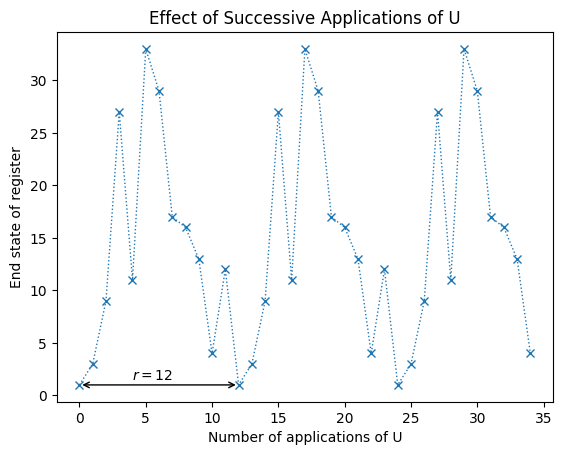

In [ ]:
ax.set(xlabel='Number of applications of U',
       ylabel='End state of register',
       title="Effect of Successive Applications of U")
fig

In [ ]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

In [ ]:
# Specify variables
N_COUNT = 8  # number of counting qubits
a = 7

In [ ]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [ ]:
# Create QuantumCircuit with N_COUNT counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(N_COUNT + 4, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(N_COUNT)

# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q),
             [q] + [i+N_COUNT for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(N_COUNT), range(N_COUNT))

# Measure circuit
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw(fold=-1)  # -1 means 'do not fold'

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─────┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

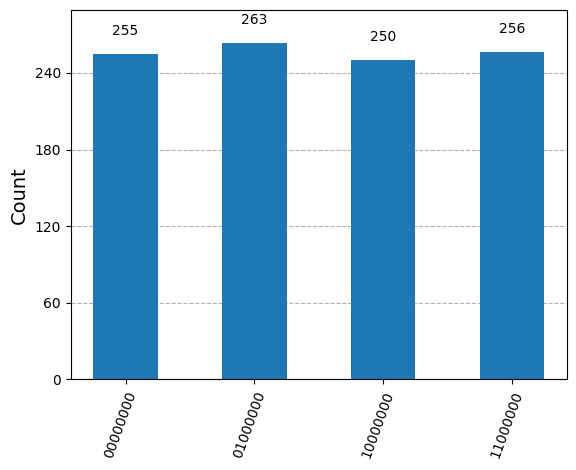

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()
plot_histogram(counts)

In [ ]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**N_COUNT)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  11000000(bin) = 192(dec)  192/256 = 0.75
1  01000000(bin) =  64(dec)   64/256 = 0.25
2  00000000(bin) =   0(dec)    0/256 = 0.00
3  10000000(bin) = 128(dec)  128/256 = 0.50


In [ ]:
N = public_key[1]

In [ ]:
N = 15

In [ ]:
np.random.seed(1) # This is to make sure we get reproduceable results
if N > 9000000000000000000:
  a = randint(2, 9000000000000000000)
else:
  a = randint(2, N)
print(a)

7692698082559361261


In [ ]:
from math import gcd # greatest common divisor
gcd(a, N)

1

In [ ]:
def qpe_amod15(a):
    """Performs quantum phase estimation on the operation a*r mod 15.
    Args:
        a (int): This is 'a' in a*r mod 15
    Returns:
        float: Estimate of the phase
    """
    N_COUNT = 8
    qc = QuantumCircuit(4+N_COUNT, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(N_COUNT) # And auxiliary register in state |1>
    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q),
                 [q] + [i+N_COUNT for i in range(4)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
    qc.measure(range(N_COUNT), range(N_COUNT))
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    # `memory=True` tells the backend to save each measurement in a list
    job = aer_sim.run(transpile(qc, aer_sim), shots=1, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase

In [ ]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

2


In [ ]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[1, 1]
